# Kütüphanelerin Yüklenmesi 📚

In [132]:
# Veri Manipülasyonu ve Analizi
import numpy as np  
import pandas as pd  
import os
import random


# Veri Görselleştirme
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno 

# Model Oluşturma
from sklearn.model_selection import train_test_split, GridSearchCV, KFold  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Algoritmalar
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model Değerlendirme
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix


Bu bölümde Hipertansiyon veri analizi ve makine öğrenmesi için gerekli tüm kütüphaneler içe aktarılır:

	•	Veri Analizi: numpy, pandas
	•	Görselleştirme: matplotlib, seaborn, missingno
	•	Modelleme: scikit-learn’in çeşitli alt modülleri
	•	Veri bölme ve çapraz doğrulama: train_test_split, KFold
	•	Modelleme: RandomForestClassifier, GradientBoostingClassifier, vb.
	•	Pipeline ve ölçekleme: Pipeline, StandardScaler
	•	Değerlendirme metrikleri: accuracy_score, classification_report, confusion_matrix

-----

# 1. Veri Setini Yükleme ve Analiz Etme 📌 

In [133]:
df = pd.read_csv("Hypertension_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


Bu adımda, Hipertansiyon veri seti .csv dosyasından içe aktarılır ve df.info() komutu ile yapısal özellikleri incelenir:

	•	Kaç satır ve sütun olduğu
	•	Hangi sütunlarda eksik veri olup olmadığı
	•	Veri türleri (int, float, object)

Bu genel bakış, veri ön işleme ve temizlik işlemleri için büyük bir önem arz etmektedir.

-----

In [134]:
print(f"Veri kümesi şunları içerir {len(df.columns)} sütunlar:")
print(list(df.columns))

Veri kümesi şunları içerir 13 sütunlar:
['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk']


In [135]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [136]:
df=df.drop(["cigsPerDay","BPMeds"],axis=1)
df.head()

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 2. Değişkenlerin Anlamları ve Tanımları (Veri Sözlüğü) 📌

-----
  
**1. Male =** Hastanın cinsiyeti. Erkek hastalar için “1”, kadın hastalar için “0” kullanılır.

**2. Age =** Hastanın yaşı (sürekli değer). Sayısal olarak belirtilmiştir, genellikle yıl cinsinden. 

**3. CurrentSmoker =** Hastanın sigara içip içmediğini belirtir.Sigara içen hastalar için "1",içmeyenler için "0" kullanılır.

**4. BpMeds =** Hastanın tansiyon ilaçları kullanıp kullanmadığını gösterir. İlaç kullanan hastalar için "1",kullanmayanlar için "0" değeri girilir

**5. Diabetes =** Hastanın diyabet hastası olup olmadığını belirtir. Evet için “1”, hayır için “0” kullanılır.

**6. TotChol =** Hastanın toplam kolesterol düzeyi (mg/dL olarak). Sayısal değişkendir.

**7. SysBp =** Hastanın kalp kasıldığında ölçülen (büyük tansiyon) basıncı.

**8. DiaBp =** Hastanın kalp gevşediğinde ölçülen (küçük tansiyon) basıncı.

**9. BMI =** Hastanın Vücut Kitle İndeksi (BMI).

**10. HeartRate =** Hastanın dakikadaki kalp atış sayısı (bpm). Sayısal değişkendir.

**11. Glucose =** Hastanın kanındaki glikoz düzeyi (mg/dL).

**12. Risk =** Hastanın yüksek tansiyon riski taşıyıp taşımadığını belirtir. Evet için "1",hayır için "0" kullanılır.




-----

# 3. Veri Setindeki Eksik Değerleri Yönetme 📌 

In [137]:
# Eksik değerlerin kontrol edilmesi
missing_data = df.isnull().sum()
print("Eksik veri sayısı:")
print(missing_data)

# Eksik verilerin yüzdesini hesaplama
total_percentage = (missing_data.sum() / df.shape[0]) * 100
print(f"Eksik verilerin toplam yüzdesi: {round(total_percentage, 2)}%")

Eksik veri sayısı:
male               0
age                0
currentSmoker      0
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
Eksik verilerin toplam yüzdesi: 10.8%


In [138]:
# Eksik verileri temizleme
df.dropna(axis=0, inplace=True)
df.isnull().sum()


male             0
age              0
currentSmoker    0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

In [139]:
df.describe()

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000
mean,0.443428,49.619545,0.490724,0.027175,237.027437,132.446825,82.958976,25.807201,75.731382,81.909851,0.313039
std,0.496854,8.574815,0.499979,0.162615,44.768324,22.074471,11.965641,4.066855,11.937477,23.753878,0.463791
min,0.000000,32.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.050000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## 4. Değişkenlerin Kategorik veya Sayısal Olarak Sınıflandırılması 📌

Burada Age,Bmi,Toplam Kolestrol(TotChol),Sistolik Tansiyon(SysBp),Diastolik Tansiyon(DiaBp),Kalp atış hızı(HeartRate),Glikoz(glucose) değerini doktorlardan almış olduğumuz eşik değerlerine göre kategorize ediyoruz.

In [140]:
conditions_Age =[
    df['age'] <50,
    df['age'] >=50
]
choices_Age=['50 yaş altı','50 yaş üstü']
df['age']=np.select(conditions_Age,choices_Age,default="Bilinmiyor")

conditions_BMI = [
    df['BMI'] < 18.5,
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30) & (df['BMI'] < 35),
    (df['BMI'] >= 35) & (df['BMI'] < 40),
    df['BMI'] >= 40
]

choices_BMI = ['Düşük_Kilolu(Zayıf)', 'Ideal_Kilo(Normal)', 'Kilolu', 'Obez I', 'Obez II','Obez III']
df['BMI'] = np.select(conditions_BMI, choices_BMI,default="Bilinmiyor")

conditions_totChol=[
    df['totChol'] < 200,
    df['totChol'] >= 200
]
choices_totChol=['Düşük Kolestrol','Yüksek Kolestrol']
df['totChol'] = np.select(conditions_totChol, choices_totChol, default="Bilinmiyor")

conditions_SysBp=[
    df['sysBP'] < 136,
    df['sysBP'] >= 136
]
choices_SysBp=['Düşük Sistolik Basınç','Yüksek Sistolik Basınç']
df['sysBP'] = np.select(conditions_SysBp,choices_SysBp,default="Bilinmiyor")

conditions_DiaBp=[
    df['diaBP'] < 85,
    df['diaBP'] >= 85
]
choices_DiaBp=['Düşük Diastolik Basınç','Yüksek Diastolik Basınç']
df['diaBP'] = np.select(conditions_DiaBp,choices_DiaBp,default="Bilinmiyor")

conditions_Heart=[
    df['heartRate'] < 80,
    df['heartRate'] >= 80
]
choices_Heart=['Düşük Kalp Hızı','Yüksek Kalp Hızı']
df['heartRate'] = np.select(conditions_Heart,choices_Heart,default="Bilinmiyor")

conditions_Glucose=[
    df['glucose'] < 80,
    df['glucose'] >= 80
]
choices_Glucose=['Düşük Şeker Değeri','Yüksek Şeker Değeri']
df['glucose'] = np.select(conditions_Glucose,choices_Glucose,default="Bilinmiyor")



In [141]:
df.head()

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,50 yaş altı,0,0,Düşük Kolestrol,Düşük Sistolik Basınç,Düşük Diastolik Basınç,Kilolu,Yüksek Kalp Hızı,Düşük Şeker Değeri,0
1,0,50 yaş altı,0,0,Yüksek Kolestrol,Düşük Sistolik Basınç,Düşük Diastolik Basınç,Kilolu,Yüksek Kalp Hızı,Düşük Şeker Değeri,0
2,1,50 yaş altı,1,0,Yüksek Kolestrol,Düşük Sistolik Basınç,Düşük Diastolik Basınç,Kilolu,Düşük Kalp Hızı,Düşük Şeker Değeri,0
3,0,50 yaş üstü,1,0,Yüksek Kolestrol,Yüksek Sistolik Basınç,Yüksek Diastolik Basınç,Kilolu,Düşük Kalp Hızı,Yüksek Şeker Değeri,1
4,0,50 yaş altı,1,0,Yüksek Kolestrol,Düşük Sistolik Basınç,Düşük Diastolik Basınç,Ideal_Kilo(Normal),Yüksek Kalp Hızı,Yüksek Şeker Değeri,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3827 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   male           3827 non-null   int64 
 1   age            3827 non-null   object
 2   currentSmoker  3827 non-null   int64 
 3   diabetes       3827 non-null   int64 
 4   totChol        3827 non-null   object
 5   sysBP          3827 non-null   object
 6   diaBP          3827 non-null   object
 7   BMI            3827 non-null   object
 8   heartRate      3827 non-null   object
 9   glucose        3827 non-null   object
 10  Risk           3827 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 358.8+ KB


Verilerimizin hepsini veri tipi olarak "category" sınıfına çeviriyoruz. Bu hem modelde performasn sağlar hemde boyuttan tasarruf sağlar.

In [143]:
df['male'] = df['male'].astype('category')
df['age'] = df['age'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['totChol'] = df['totChol'].astype('category')
df['sysBP'] = df['sysBP'].astype('category')
df['diaBP'] = df['diaBP'].astype('category')
df['BMI'] = df['BMI'].astype('category')
df['heartRate'] = df['heartRate'].astype('category')
df['glucose'] = df['glucose'].astype('category')
df['Risk'] = df['Risk'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3827 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   male           3827 non-null   category
 1   age            3827 non-null   category
 2   currentSmoker  3827 non-null   category
 3   diabetes       3827 non-null   category
 4   totChol        3827 non-null   category
 5   sysBP          3827 non-null   category
 6   diaBP          3827 non-null   category
 7   BMI            3827 non-null   category
 8   heartRate      3827 non-null   category
 9   glucose        3827 non-null   category
 10  Risk           3827 non-null   category
dtypes: category(11)
memory usage: 72.4 KB


Veriyi label encoding işlemine sokuyoruz.

In [144]:
le = LabelEncoder()
df['BMI'] = le.fit_transform(df['BMI'])
df['age'] = le.fit_transform(df['age'])
df['totChol'] = le.fit_transform(df['totChol'])
df['sysBP'] = le.fit_transform(df['sysBP'])
df['diaBP'] = le.fit_transform(df['diaBP'])
df['heartRate'] = le.fit_transform(df['heartRate'])
df['glucose'] = le.fit_transform(df['glucose'])

df.head()

,male,age,currentSmoker,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,0,0,0,0,0,0,2,1,0,0
1,0,0,0,0,1,0,0,2,1,0,0
2,1,0,1,0,1,0,0,2,0,0,0
3,0,1,1,0,1,1,1,2,0,1,1
4,0,0,1,0,1,0,0,1,1,1,0


## 5. İstatistiksel Analiz Ve  Veri Görselleştirme 📌

### 5.1 Cinsiyet ve Hipertansiyon Durumu

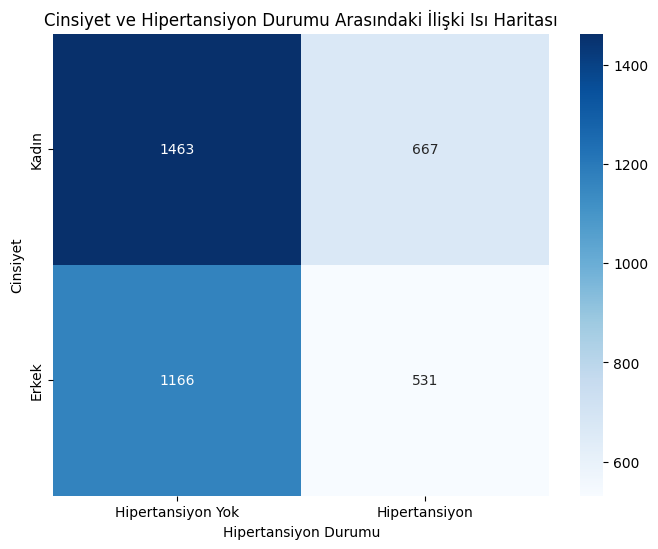

In [145]:
# Cinsiyet ve Hipertansiyon arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['male'].map({0: 'Kadın', 1: 'Erkek'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Cinsiyet ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Cinsiyet')
plt.show()

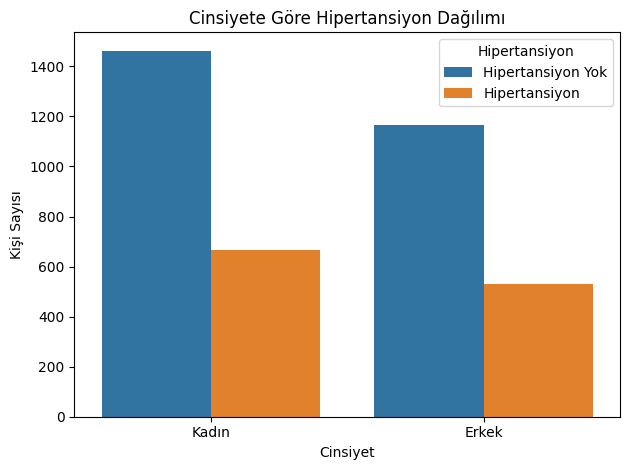

In [146]:
sns.countplot(data=df, 
              x=df['male'].map({0: 'Kadın', 1: 'Erkek'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Cinsiyete Göre Hipertansiyon Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


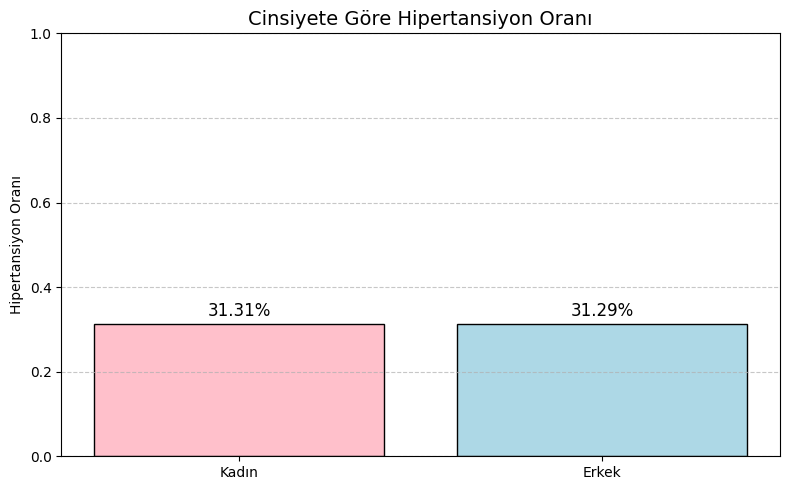

In [147]:
# Cinsiyete göre hipertansiyon oranlarını hesapla
Hypertension_female = len(df[(df['male'] == 0) & (df['Risk'] == 1)])
Total_female = len(df[df['male'] == 0])

Hypertension_male = len(df[(df['male'] == 1) & (df['Risk'] == 1)])
Total_male = len(df[df['male'] == 1])

Rate_female = Hypertension_female / Total_female if Total_female != 0 else 0
Rate_male = Hypertension_male / Total_male if Total_male != 0 else 0

# Grafik verileri
labels = ['Kadın', 'Erkek']
rates = [Rate_female, Rate_male]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['pink', 'lightblue'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Cinsiyete Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.2 Yaş ve Hipertansiyon Durumu

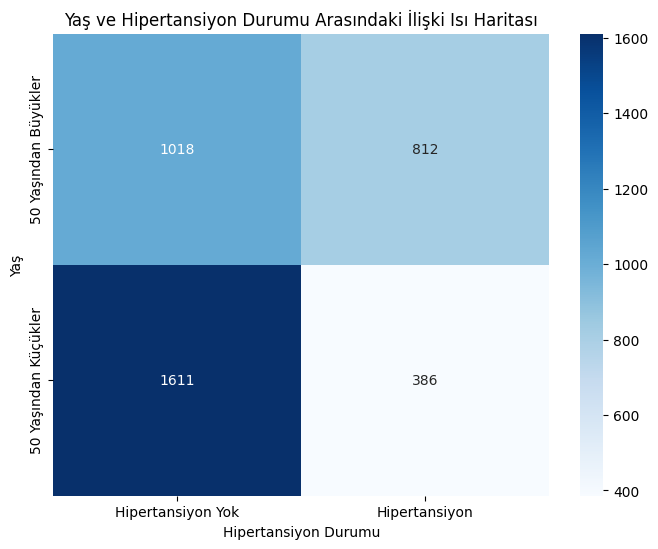

In [148]:
# Cinsiyet ve Hipertansiyon arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['age'].map({0: '50 Yaşından Küçükler', 1: '50 Yaşından Büyükler'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Yaş ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Yaş')
plt.show()

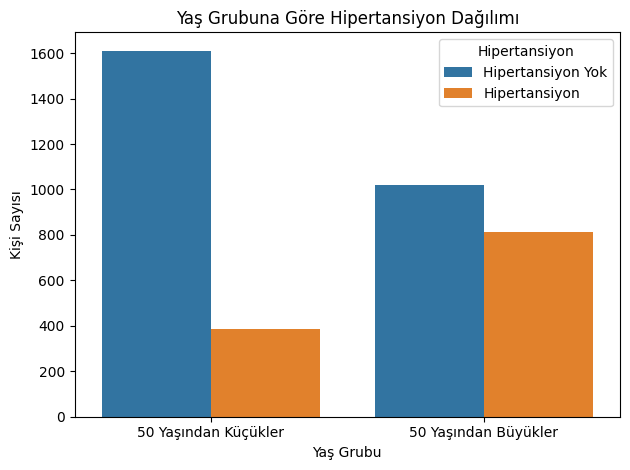

In [149]:
sns.countplot(data=df, 
              x=df['age'].map({0: '50 Yaşından Küçükler', 1: '50 Yaşından Büyükler'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Yaş Grubuna Göre Hipertansiyon Dağılımı')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


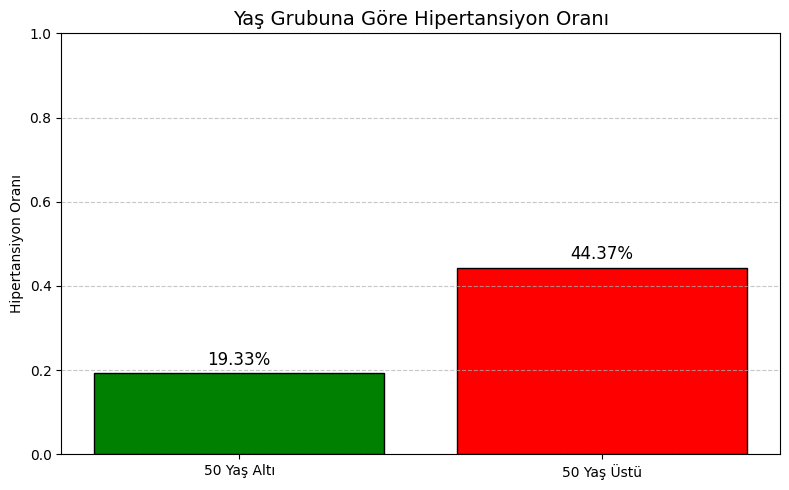

In [150]:
# Yaş grubuna göre hipertansiyon oranlarını hesapla
Hypertension_under50 = len(df[(df['age'] == 0) & (df['Risk'] == 1)])
Total_under50 = len(df[df['age'] == 0])

Hypertension_over50 = len(df[(df['age'] == 1) & (df['Risk'] == 1)])
Total_over50 = len(df[df['age'] == 1])

Rate_under50 = Hypertension_under50 / Total_under50 if Total_under50 != 0 else 0
Rate_over50 = Hypertension_over50 / Total_over50 if Total_over50 != 0 else 0

# Grafik verileri
labels = ['50 Yaş Altı', '50 Yaş Üstü']
rates = [Rate_under50, Rate_over50]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Yaş Grubuna Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.3 Sigara İçme ve Hipertansiyon Durumu

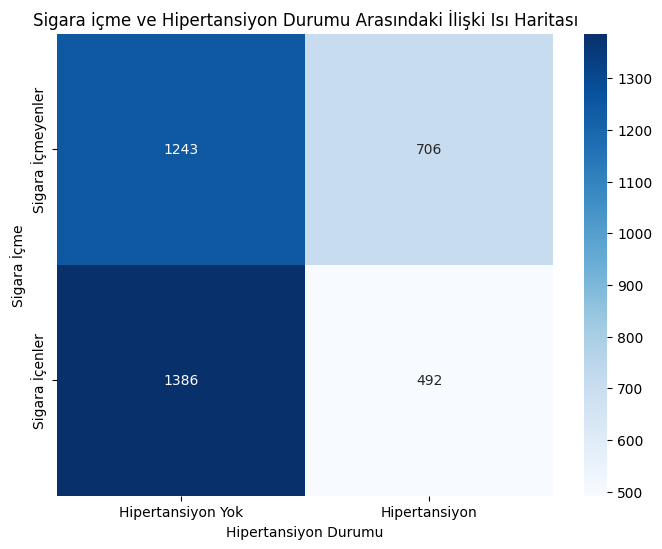

In [151]:
# Cinsiyet ve Hipertansiyon arasındaki ilişkiyi görselleştirmek için bir ısı haritası oluştur
contingency_table = pd.crosstab(df['currentSmoker'].map({0: 'Sigara İçmeyenler', 1: 'Sigara İçenler'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Sigara içme ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Sigara İçme')
plt.show()

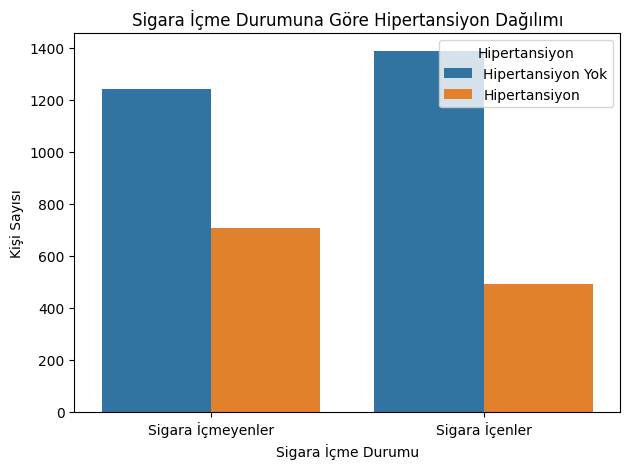

In [152]:
sns.countplot(data=df, 
              x=df['currentSmoker'].map({0: 'Sigara İçmeyenler', 1: 'Sigara İçenler'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Sigara İçme Durumuna Göre Hipertansiyon Dağılımı')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


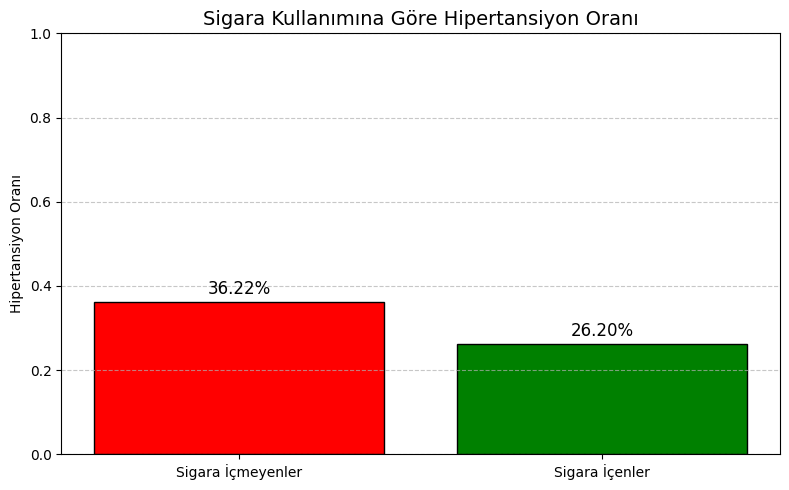

In [153]:
# Sigara içme durumuna göre hipertansiyon oranlarını hesapla
Hypertension_nonsmoker = len(df[(df['currentSmoker'] == 0) & (df['Risk'] == 1)])
Total_nonsmoker = len(df[df['currentSmoker'] == 0])

Hypertension_smoker = len(df[(df['currentSmoker'] == 1) & (df['Risk'] == 1)])
Total_smoker = len(df[df['currentSmoker'] == 1])

Rate_nonsmoker = Hypertension_nonsmoker / Total_nonsmoker if Total_nonsmoker != 0 else 0
Rate_smoker = Hypertension_smoker / Total_smoker if Total_smoker != 0 else 0

# Grafik verileri
labels = ['Sigara İçmeyenler', 'Sigara İçenler']
rates = [Rate_nonsmoker, Rate_smoker]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['red', 'green'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Sigara Kullanımına Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.4 Diyabet ve Hipertansiyon Durumu

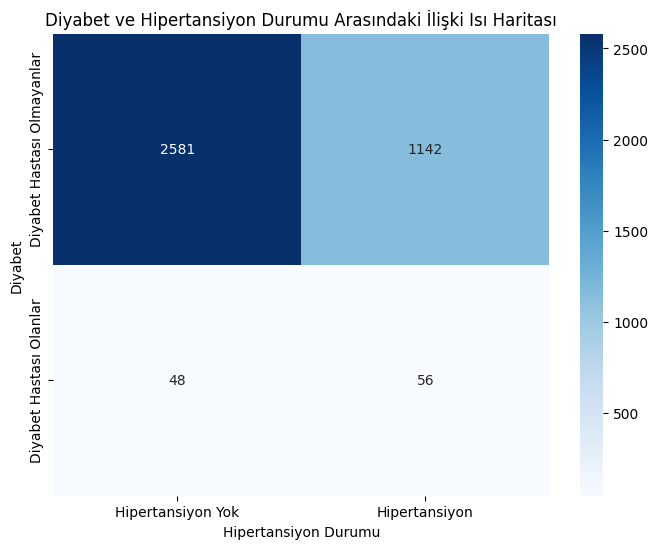

In [154]:
contingency_table = pd.crosstab(df['diabetes'].map({0: 'Diyabet Hastası Olmayanlar', 1: 'Diyabet Hastası Olanlar'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Diyabet ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Diyabet')
plt.show()

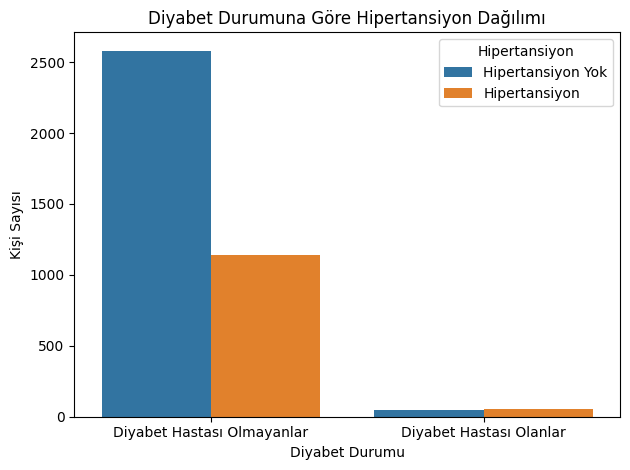

In [155]:
sns.countplot(data=df, 
              x=df['diabetes'].map({0: 'Diyabet Hastası Olmayanlar', 1: 'Diyabet Hastası Olanlar'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Diyabet Durumuna Göre Hipertansiyon Dağılımı')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


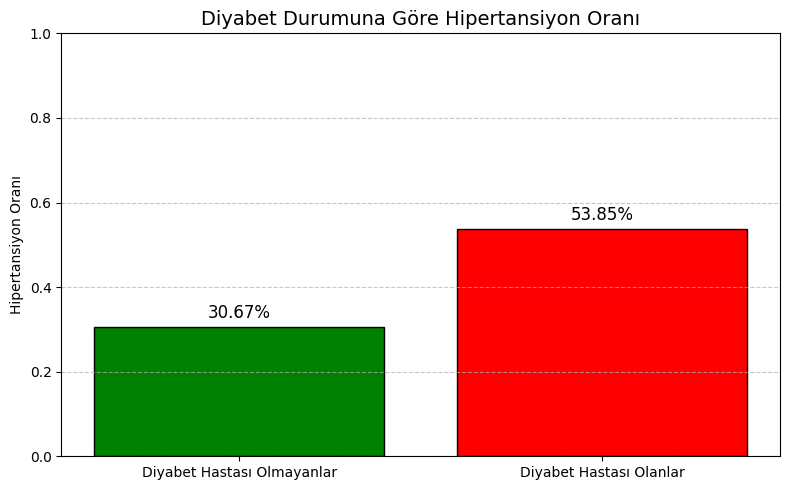

In [156]:
# Diyabet durumuna göre hipertansiyon oranlarını hesapla
Hypertension_nondiabetic = len(df[(df['diabetes'] == 0) & (df['Risk'] == 1)])
Total_nondiabetic = len(df[df['diabetes'] == 0])

Hypertension_diabetic = len(df[(df['diabetes'] == 1) & (df['Risk'] == 1)])
Total_diabetic = len(df[df['diabetes'] == 1])

Rate_nondiabetic = Hypertension_nondiabetic / Total_nondiabetic if Total_nondiabetic != 0 else 0
Rate_diabetic = Hypertension_diabetic / Total_diabetic if Total_diabetic != 0 else 0

# Grafik verileri
labels = ['Diyabet Hastası Olmayanlar', 'Diyabet Hastası Olanlar']
rates = [Rate_nondiabetic, Rate_diabetic]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Diyabet Durumuna Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.5 Toplam Kolesterol ve Hipertansiyon Durumu

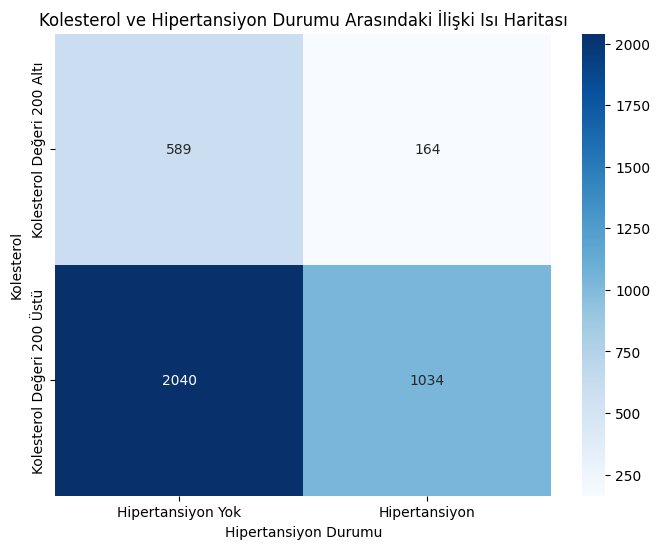

In [157]:
contingency_table = pd.crosstab(df['totChol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Kolesterol ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Kolesterol')
plt.show()

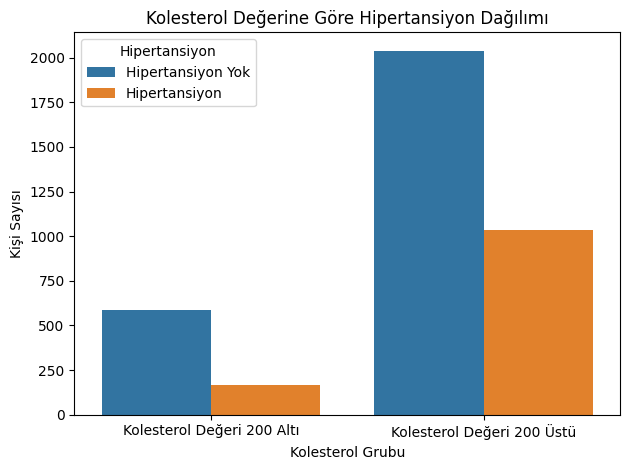

In [158]:
sns.countplot(data=df, 
              x=df['totChol'].map({0: 'Kolesterol Değeri 200 Altı', 1: 'Kolesterol Değeri 200 Üstü'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Kolesterol Değerine Göre Hipertansiyon Dağılımı')
plt.xlabel('Kolesterol Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


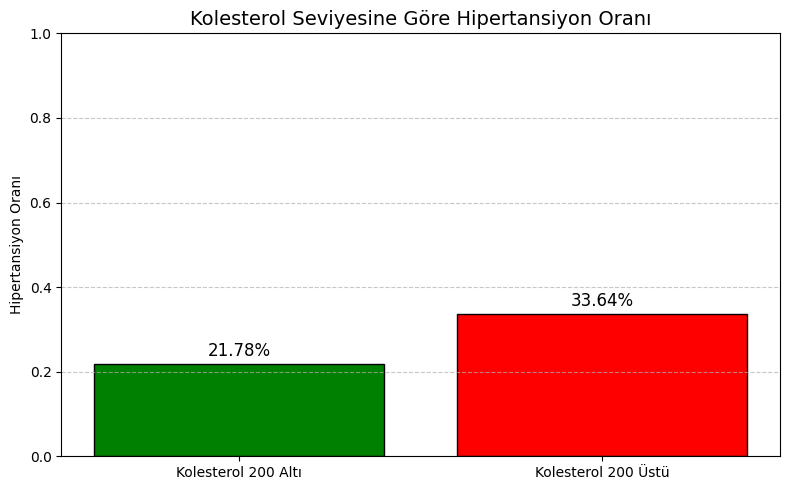

In [159]:
# Kolesterol seviyesine göre hipertansiyon oranlarını hesapla
Hypertension_low_chol = len(df[(df['totChol'] == 0) & (df['Risk'] == 1)])
Total_low_chol = len(df[df['totChol'] == 0])

Hypertension_high_chol = len(df[(df['totChol'] == 1) & (df['Risk'] == 1)])
Total_high_chol = len(df[df['totChol'] == 1])

Rate_low_chol = Hypertension_low_chol / Total_low_chol if Total_low_chol != 0 else 0
Rate_high_chol = Hypertension_high_chol / Total_high_chol if Total_high_chol != 0 else 0

# Grafik verileri
labels = ['Kolesterol 200 Altı', 'Kolesterol 200 Üstü']
rates = [Rate_low_chol, Rate_high_chol]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Kolesterol Seviyesine Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.6 Sistolik Kan Basıncı ve Hipertansiyon Durumu

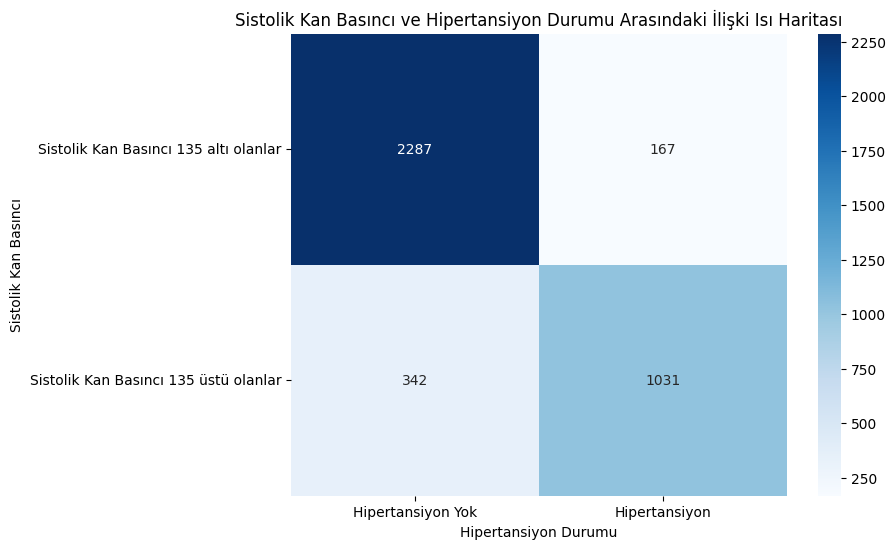

In [160]:
contingency_table = pd.crosstab(df['sysBP'].map({0: 'Sistolik Kan Basıncı 135 altı olanlar', 1: 'Sistolik Kan Basıncı 135 üstü olanlar'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Sistolik Kan Basıncı ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Sistolik Kan Basıncı')
plt.show()

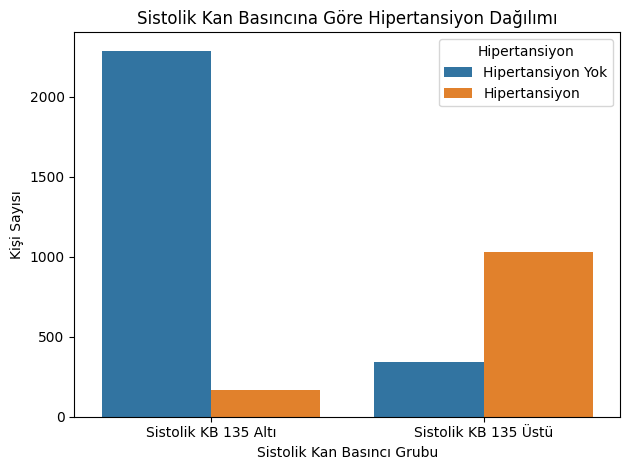

In [161]:
sns.countplot(data=df, 
              x=df['sysBP'].map({0: 'Sistolik KB 135 Altı', 1: 'Sistolik KB 135 Üstü'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Sistolik Kan Basıncına Göre Hipertansiyon Dağılımı')
plt.xlabel('Sistolik Kan Basıncı Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


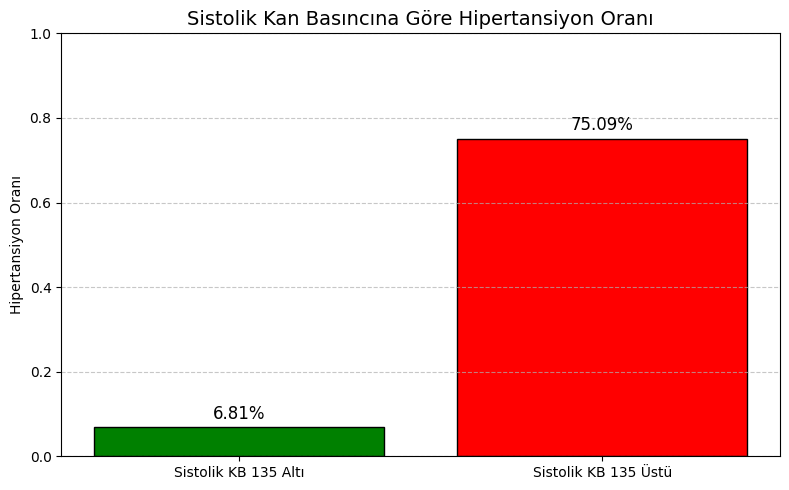

In [162]:
# Sistolik kan basıncına göre hipertansiyon oranlarını hesapla
Hypertension_low_sysBP = len(df[(df['sysBP'] == 0) & (df['Risk'] == 1)])
Total_low_sysBP = len(df[df['sysBP'] == 0])

Hypertension_high_sysBP = len(df[(df['sysBP'] == 1) & (df['Risk'] == 1)])
Total_high_sysBP = len(df[df['sysBP'] == 1])

Rate_low_sysBP = Hypertension_low_sysBP / Total_low_sysBP if Total_low_sysBP != 0 else 0
Rate_high_sysBP = Hypertension_high_sysBP / Total_high_sysBP if Total_high_sysBP != 0 else 0

# Grafik verileri
labels = ['Sistolik KB 135 Altı', 'Sistolik KB 135 Üstü']
rates = [Rate_low_sysBP, Rate_high_sysBP]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Sistolik Kan Basıncına Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.7 Diastolik Kan Basıncı ve Hipertansiyon Durumu

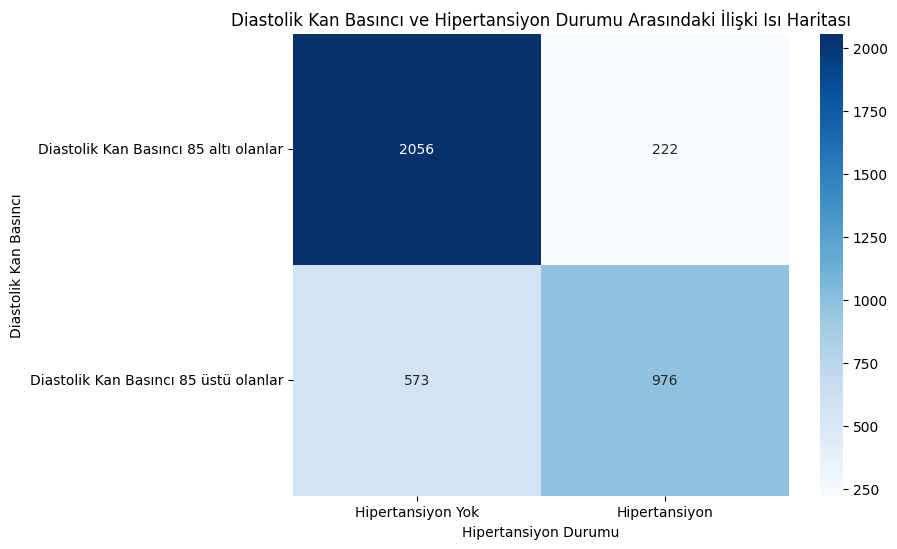

In [163]:
contingency_table = pd.crosstab(df['diaBP'].map({0: 'Diastolik Kan Basıncı 85 altı olanlar', 1: 'Diastolik Kan Basıncı 85 üstü olanlar'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Diastolik Kan Basıncı ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Diastolik Kan Basıncı')
plt.show()

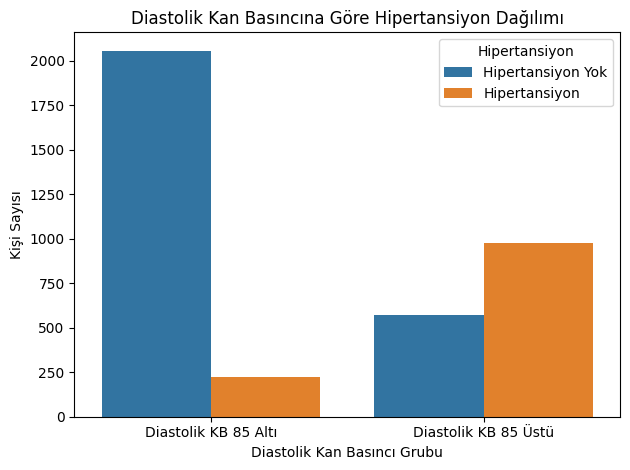

In [164]:
sns.countplot(data=df, 
              x=df['diaBP'].map({0: 'Diastolik KB 85 Altı', 1: 'Diastolik KB 85 Üstü'}), 
              hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.title('Diastolik Kan Basıncına Göre Hipertansiyon Dağılımı')
plt.xlabel('Diastolik Kan Basıncı Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


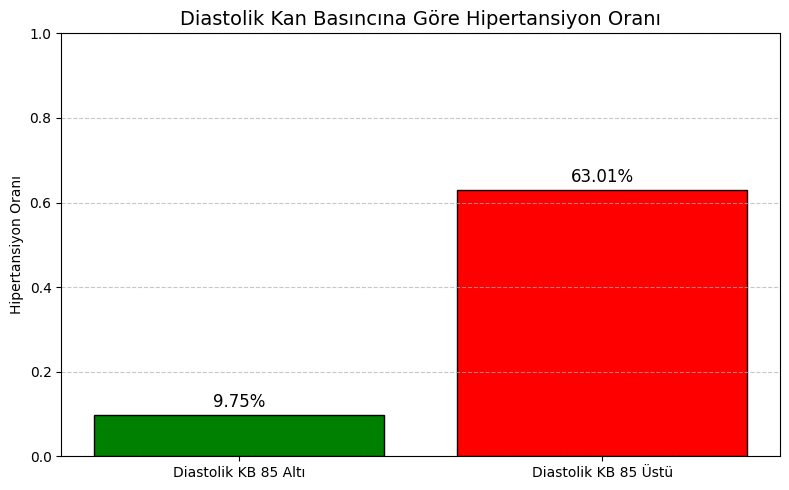

In [165]:
# Diastolik kan basıncına göre hipertansiyon oranlarını hesapla
Hypertension_low_diaBP = len(df[(df['diaBP'] == 0) & (df['Risk'] == 1)])
Total_low_diaBP = len(df[df['diaBP'] == 0])

Hypertension_high_diaBP = len(df[(df['diaBP'] == 1) & (df['Risk'] == 1)])
Total_high_diaBP = len(df[df['diaBP'] == 1])

Rate_low_diaBP = Hypertension_low_diaBP / Total_low_diaBP if Total_low_diaBP != 0 else 0
Rate_high_diaBP = Hypertension_high_diaBP / Total_high_diaBP if Total_high_diaBP != 0 else 0

# Grafik verileri
labels = ['Diastolik KB 85 Altı', 'Diastolik KB 85 Üstü']
rates = [Rate_low_diaBP, Rate_high_diaBP]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Diastolik Kan Basıncına Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.8 BMI ve Hipertansiyon Durumu

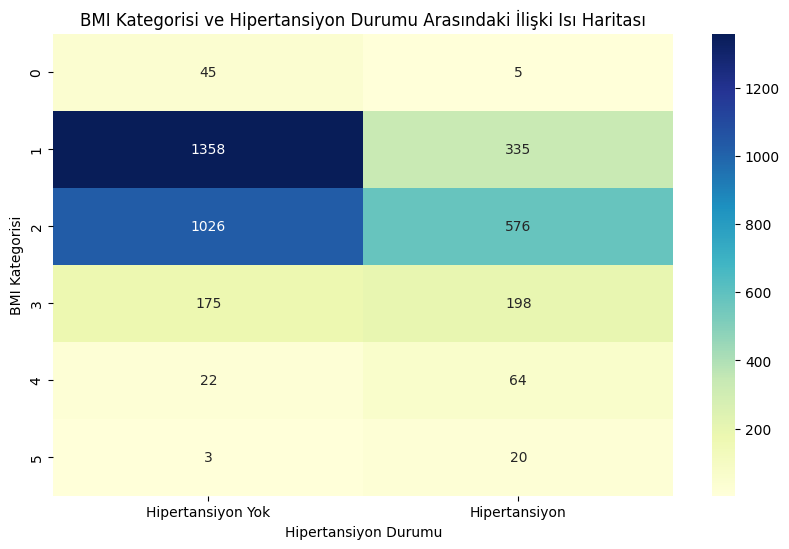

In [166]:
contingency_table_bmi = pd.crosstab(df['BMI'], df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_bmi, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('BMI Kategorisi ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('BMI Kategorisi')
plt.show()


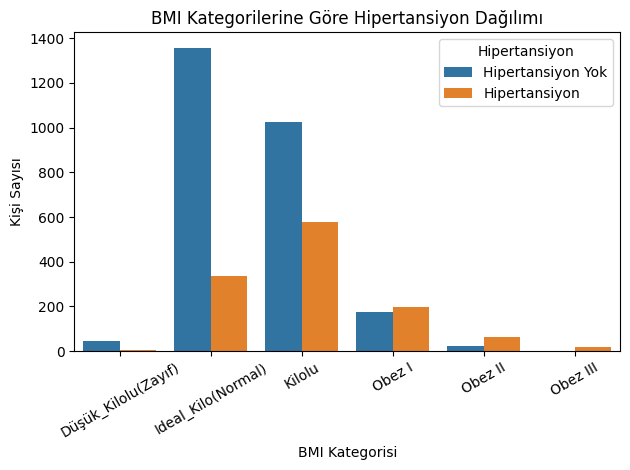

In [167]:
# BMI kategorilerini etiketle
bmi_labels = {
    0: 'Düşük_Kilolu(Zayıf)', 
    1: 'Ideal_Kilo(Normal)', 
    2: 'Kilolu', 
    3: 'Obez I', 
    4: 'Obez II', 
    5: 'Obez III'
}

# Doğru sırayla çizmek için sıralı etiket listesi
ordered_labels = [bmi_labels[i] for i in sorted(bmi_labels.keys())]

# Çizim
sns.countplot(
    data=df, 
    x=df['BMI'].map(bmi_labels), 
    hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}),
    order=ordered_labels
)

plt.title('BMI Kategorilerine Göre Hipertansiyon Dağılımı')
plt.xlabel('BMI Kategorisi')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


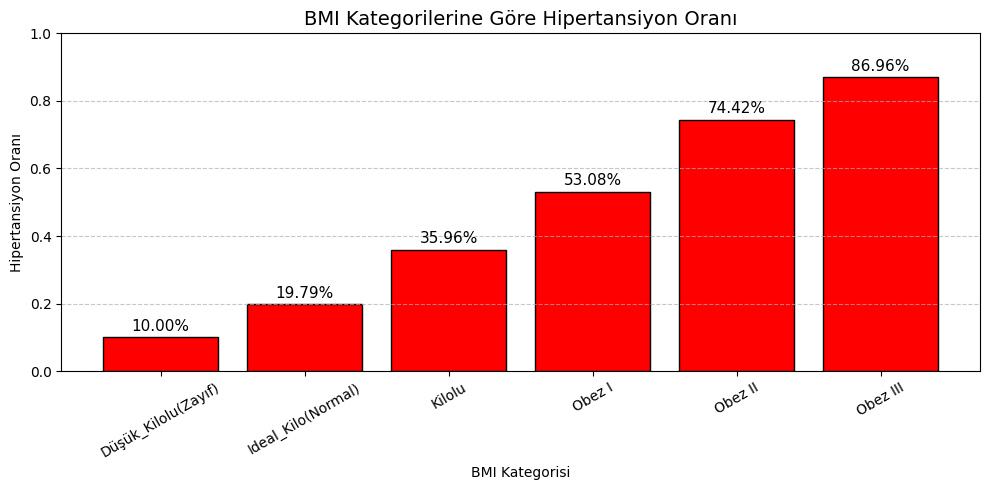

In [168]:
# BMI kategorilerini etiketle
bmi_labels = {
    0: 'Düşük_Kilolu(Zayıf)', 
    1: 'Ideal_Kilo(Normal)', 
    2: 'Kilolu', 
    3: 'Obez I', 
    4: 'Obez II', 
    5: 'Obez III'
}

# Her kategori için hipertansiyon oranını hesapla
bmi_rates = []
for code in sorted(bmi_labels.keys()):
    total = len(df[df['BMI'] == code])
    hypertensive = len(df[(df['BMI'] == code) & (df['Risk'] == 1)])
    rate = hypertensive / total if total != 0 else 0
    bmi_rates.append(rate)

# Etiket sırası
labels = [bmi_labels[i] for i in sorted(bmi_labels.keys())]

# Grafik çizimi
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, bmi_rates, color='red', edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('BMI Kategorilerine Göre Hipertansiyon Oranı', fontsize=14)
plt.xlabel('BMI Kategorisi')
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.9 Kalp Hızı ve Hipertansiyon Durumu

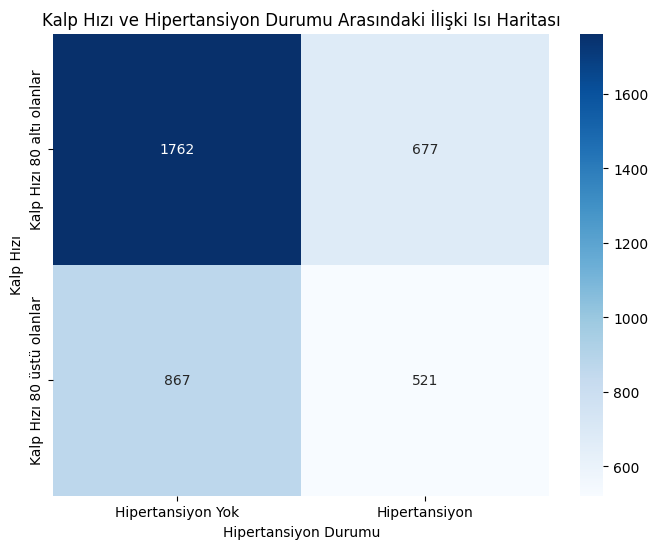

In [169]:
contingency_table = pd.crosstab(df['heartRate'].map({0: 'Kalp Hızı 80 altı olanlar', 1: 'Kalp Hızı 80 üstü olanlar'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Kalp Hızı ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Kalp Hızı')
plt.show()

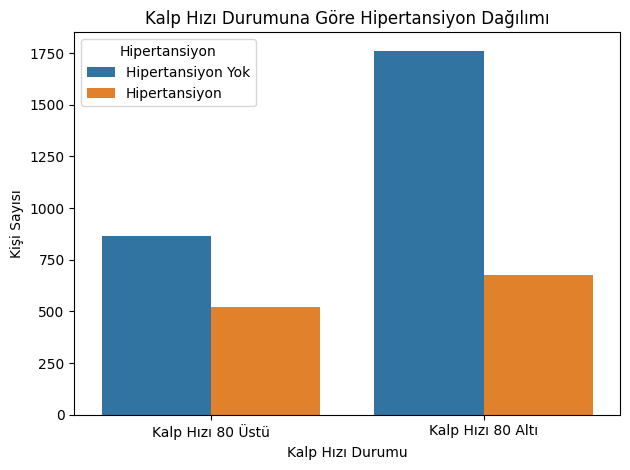

In [170]:
sns.countplot(
    data=df,
    x=df['heartRate'].map({0: 'Kalp Hızı 80 Altı', 1: 'Kalp Hızı 80 Üstü'}),
    hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'})
)

plt.title('Kalp Hızı Durumuna Göre Hipertansiyon Dağılımı')
plt.xlabel('Kalp Hızı Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


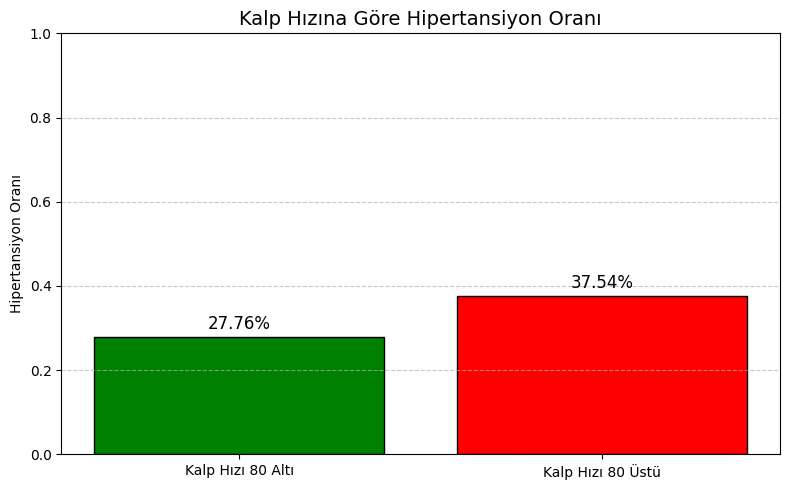

In [171]:
# Kalp hızı kategorisine göre hipertansiyon oranlarını hesapla
Hypertension_low_hr = len(df[(df['heartRate'] == 0) & (df['Risk'] == 1)])
Total_low_hr = len(df[df['heartRate'] == 0])

Hypertension_high_hr = len(df[(df['heartRate'] == 1) & (df['Risk'] == 1)])
Total_high_hr = len(df[df['heartRate'] == 1])

Rate_low_hr = Hypertension_low_hr / Total_low_hr if Total_low_hr != 0 else 0
Rate_high_hr = Hypertension_high_hr / Total_high_hr if Total_high_hr != 0 else 0

# Grafik verileri
labels = ['Kalp Hızı 80 Altı', 'Kalp Hızı 80 Üstü']
rates = [Rate_low_hr, Rate_high_hr]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=12)

plt.title('Kalp Hızına Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 5.10 Glikoz ve Hipertansiyon Durumu

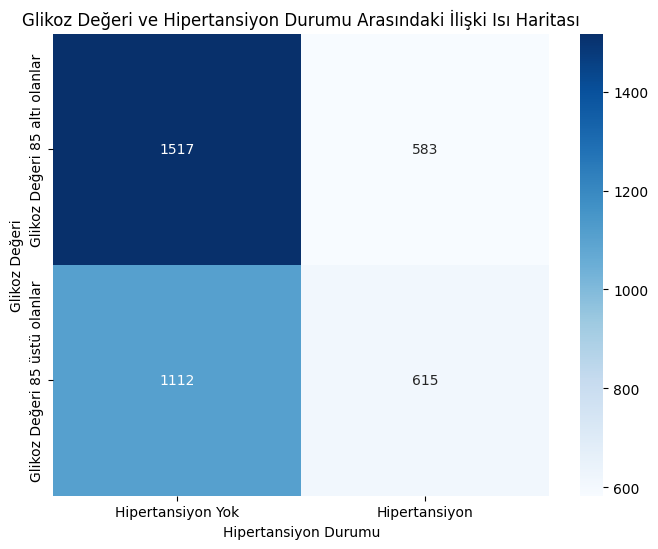

In [172]:
contingency_table = pd.crosstab(df['glucose'].map({0: 'Glikoz Değeri 85 altı olanlar', 1: 'Glikoz Değeri 85 üstü olanlar'}),
                                df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'}))

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Glikoz Değeri ve Hipertansiyon Durumu Arasındaki İlişki Isı Haritası')
plt.xlabel('Hipertansiyon Durumu')
plt.ylabel('Glikoz Değeri')
plt.show()

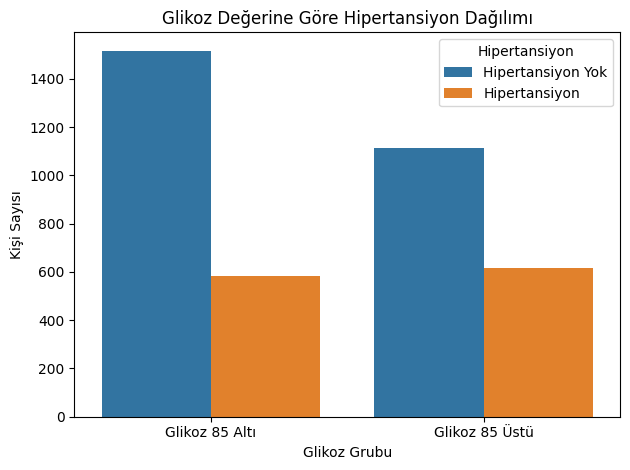

In [173]:
sns.countplot(
    data=df,
    x=df['glucose'].map({0: 'Glikoz 85 Altı', 1: 'Glikoz 85 Üstü'}),
    hue=df['Risk'].map({0: 'Hipertansiyon Yok', 1: 'Hipertansiyon'})
)

plt.title('Glikoz Değerine Göre Hipertansiyon Dağılımı')
plt.xlabel('Glikoz Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Hipertansiyon')
plt.tight_layout()
plt.show()


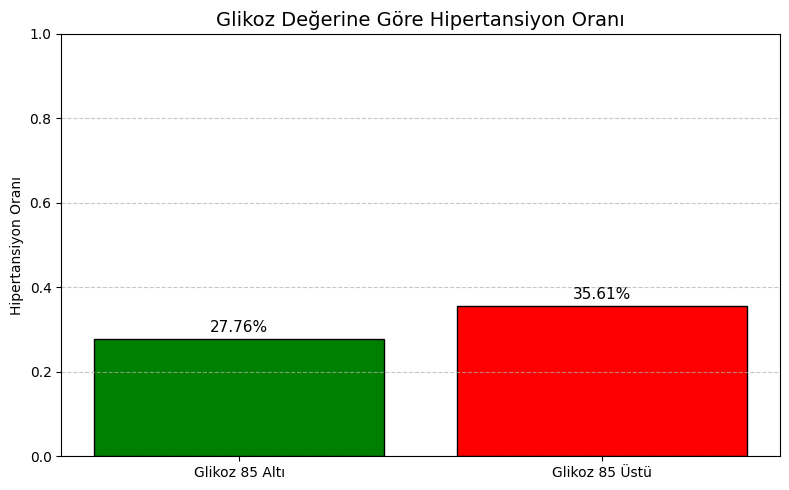

In [174]:
# Glikoz seviyesine göre hipertansiyon oranlarını hesapla
hypertension_low_glucose = len(df[(df['glucose'] == 0) & (df['Risk'] == 1)])
total_low_glucose = len(df[df['glucose'] == 0])

hypertension_high_glucose = len(df[(df['glucose'] == 1) & (df['Risk'] == 1)])
total_high_glucose = len(df[df['glucose'] == 1])

rate_low_glucose = hypertension_low_glucose / total_low_glucose if total_low_glucose != 0 else 0
rate_high_glucose = hypertension_high_glucose / total_high_glucose if total_high_glucose != 0 else 0

# Grafik verileri
labels = ['Glikoz 85 Altı', 'Glikoz 85 Üstü']
rates = [rate_low_glucose, rate_high_glucose]

# Grafik çizimi
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=['green', 'red'], edgecolor='black')

# Yüzdelik etiketler
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', va='bottom', fontsize=11)

plt.title('Glikoz Değerine Göre Hipertansiyon Oranı', fontsize=14)
plt.ylabel('Hipertansiyon Oranı')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [175]:
df['male'] = df['male'].astype('category')
df['age'] = df['age'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['totChol'] = df['totChol'].astype('category')
df['sysBP'] = df['sysBP'].astype('category')
df['diaBP'] = df['diaBP'].astype('category')
df['BMI'] = df['BMI'].astype('category')
df['heartRate'] = df['heartRate'].astype('category')
df['glucose'] = df['glucose'].astype('category')
df['Risk'] = df['Risk'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3827 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   male           3827 non-null   category
 1   age            3827 non-null   category
 2   currentSmoker  3827 non-null   category
 3   diabetes       3827 non-null   category
 4   totChol        3827 non-null   category
 5   sysBP          3827 non-null   category
 6   diaBP          3827 non-null   category
 7   BMI            3827 non-null   category
 8   heartRate      3827 non-null   category
 9   glucose        3827 non-null   category
 10  Risk           3827 non-null   category
dtypes: category(11)
memory usage: 72.4 KB


## 6.Hipertansiyon Hastalarında Değişkenler Arası Korelasyon Analizi

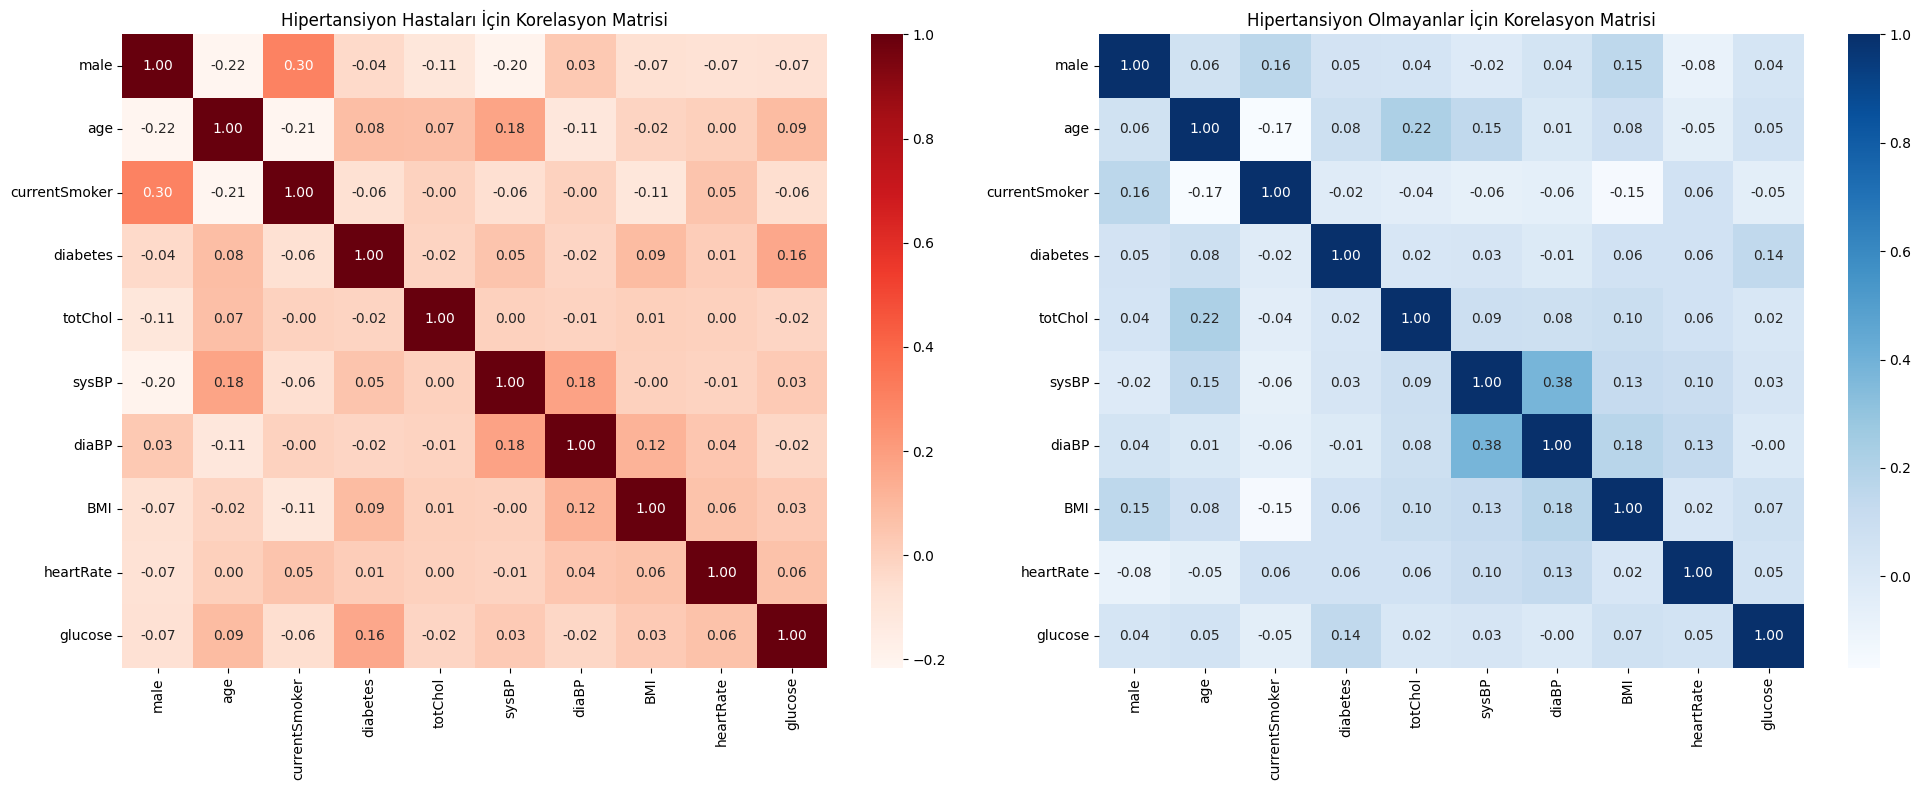

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Hipertansiyon hastaları ---
df_hyper = df[df['Risk'] == 1].copy()
for col in df_hyper.select_dtypes(include='category').columns:
    df_hyper[col] = df_hyper[col].cat.codes
corr_hyper = df_hyper.drop(columns=['Risk']).corr()

# --- 2. Hipertansiyon olmayanlar ---
df_nonhyper = df[df['Risk'] == 0].copy()
for col in df_nonhyper.select_dtypes(include='category').columns:
    df_nonhyper[col] = df_nonhyper[col].cat.codes
corr_nonhyper = df_nonhyper.drop(columns=['Risk']).corr()

# --- 3. YAN YANA heatmap görselleştirme ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_hyper, annot=True, fmt=".2f", cmap="Reds", ax=axes[0])
axes[0].set_title("Hipertansiyon Hastaları İçin Korelasyon Matrisi")

sns.heatmap(corr_nonhyper, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title("Hipertansiyon Olmayanlar İçin Korelasyon Matrisi")

plt.tight_layout()
plt.show()


## 7 Hipertansiyon ve Diğer Değişkenler Arasında Korelasyon

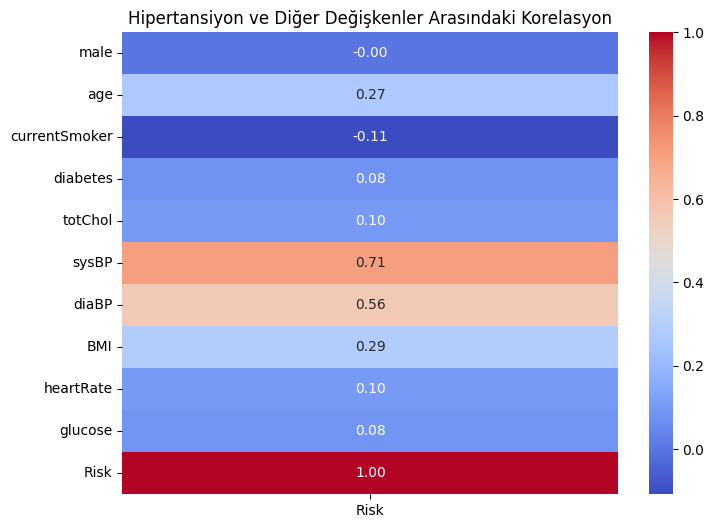

In [177]:
correlation_matrix = df.corr() 
hypertension_related_corr = correlation_matrix[['Risk']]

plt.figure(figsize=(8, 6))
sns.heatmap(hypertension_related_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Hipertansiyon ve Diğer Değişkenler Arasındaki Korelasyon')
plt.show()

# 📌 8. Model Seçimi ve Hiperparametre Ayarlaması (GridSearchCV)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
En iyi parametreler: {'classifier': <catboost.core.CatBoostClassifier object at 0x000001F54686D220>, 'classifier__depth': 4, 'classifier__iterations': 100, 'classifier__learning_rate': 0.01}
En iyi F1 skoru: 0.8051


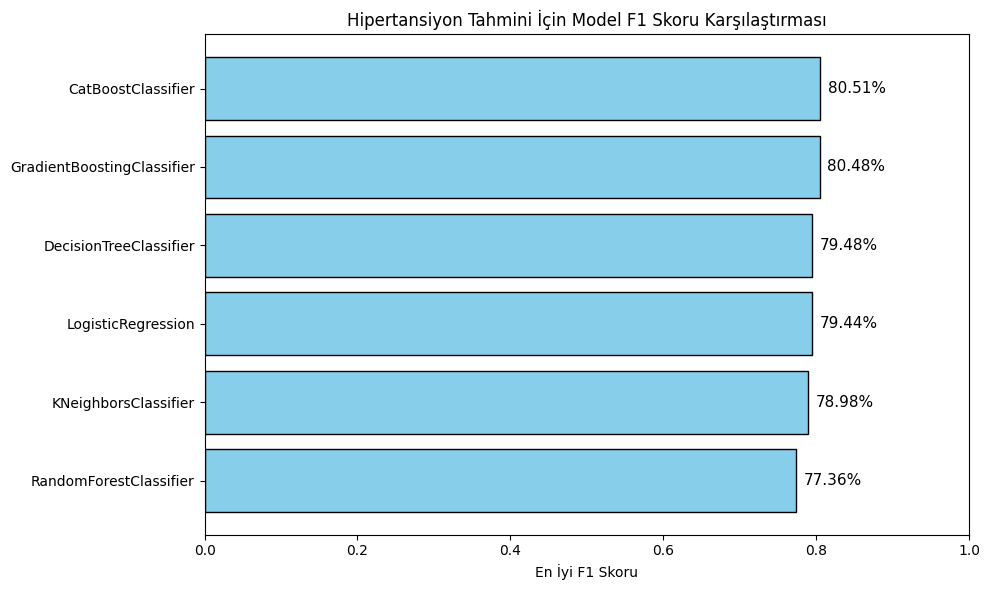

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# 1. Veri setini ayır
X = df.drop(['Risk'], axis=1)
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))  # dummy model
])

# 3. Parametre ızgarası (CatBoost dahil)
param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_split': [2, 5]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1]
    },
    {
        'classifier': [CatBoostClassifier(verbose=0, train_dir="./catboost_temp", random_state=42)],
        'classifier__iterations': [100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__depth': [4, 6]
    }
]

# 4. KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5. GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# 6. En iyi sonuçlar
print("En iyi parametreler:", grid_search.best_params_)
print(f"En iyi F1 skoru: {grid_search.best_score_:.4f}")

# 7. Her model türü için en iyi F1 skorlarını topla
results = pd.DataFrame(grid_search.cv_results_)
model_scores = []

for model_type in set(type(m) for m in results['param_classifier']):
    model_name = model_type.__name__
    best_f1 = results[[type(m) == model_type for m in results['param_classifier']]]['mean_test_score'].max()
    model_scores.append((model_name, best_f1))

# 8. Sırala ve DataFrame'e dönüştür
model_scores_sorted = sorted(model_scores, key=lambda x: x[1], reverse=True)
df_scores = pd.DataFrame(model_scores_sorted, columns=["Model", "Best F1 Score"])

# 9. Grafik çizimi
plt.figure(figsize=(10, 6))
bars = plt.barh(df_scores["Model"], df_scores["Best F1 Score"], color='skyblue', edgecolor='black')
plt.xlabel("En İyi F1 Skoru")
plt.title("Hipertansiyon Tahmini İçin Model F1 Skoru Karşılaştırması")
plt.xlim(0, 1)

# Yüzdelik etiketler
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2%}", va='center', fontsize=11)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 📌 9. Özellik Önem Dereceleri – CatBoost Modeli

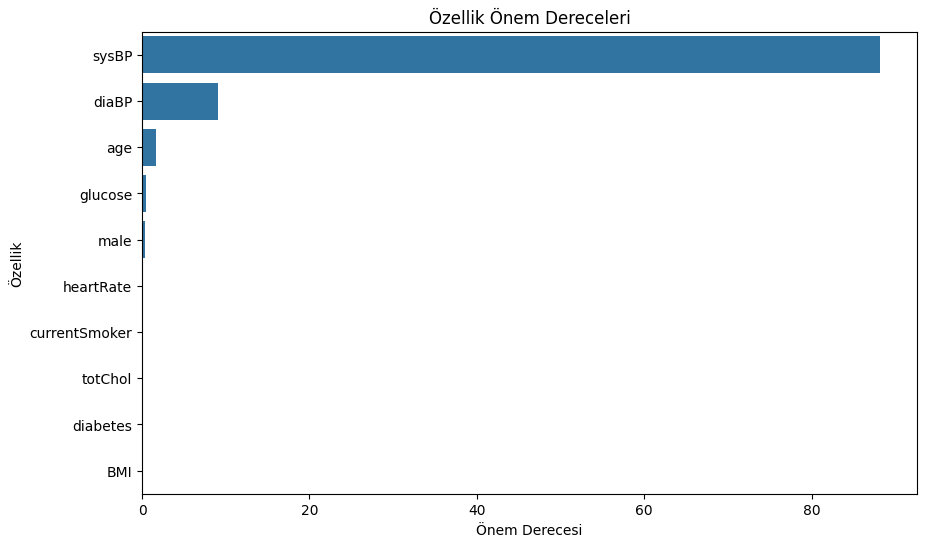

In [179]:
cat_features = X.select_dtypes(include='category').columns.tolist()
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.01,
    depth=4,
    cat_features=cat_features,
    verbose=0,
    random_state=42
)

# Eğitimi yap
model.fit(X_train, y_train)
# Modelden özellik önemlerini al
importances = model.feature_importances_  
feature_importances = pd.DataFrame({'Özellik': X.columns, 'Önem Derecesi': importances})  
sorted_feature_importances = feature_importances.sort_values(by='Önem Derecesi', ascending=False)

# Özellik önemlerini görselleştir
plt.figure(figsize=(10, 6))  
sns.barplot(x='Önem Derecesi', y='Özellik', data=sorted_feature_importances)  
plt.title('Özellik Önem Dereceleri')  
plt.show()


# 💯 10. Modelin Doğruluk Skorunun Hesaplanması

In [180]:
# Modelin tahmin ettiği değerleri gerçek test etiketleriyle karşılaştırarak doğruluğunu hesapla
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Modelin doğruluğu şu şekilde hesaplandı: {accuracy:.4f}")

Modelin doğruluğu şu şekilde hesaplandı: 0.8577


# 📈 11. Modelin Performans Değerlendirme Raporu – Sınıflandırma Metrikleri

In [181]:
print("Modelin performans değerlendirme raporu:")
print(classification_report(y_test, y_pred))

Modelin performans değerlendirme raporu:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       518
           1       0.76      0.82      0.79       248

    accuracy                           0.86       766
   macro avg       0.83      0.85      0.84       766
weighted avg       0.86      0.86      0.86       766



# 📌 12. Karmaşıklık Matrisi (Confusion Matrix) – Modelin Hata Analizi

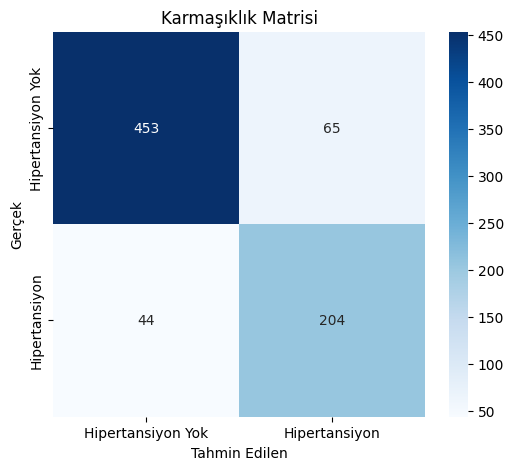

In [182]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hipertansiyon Yok', 'Hipertansiyon'], 
            yticklabels=['Hipertansiyon Yok', 'Hipertansiyon'])

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()

# 📌 13. Modelin Kaydedilmesi – joblib ile .pkl Formatında

In [183]:
import joblib  # Modeli kaydetmek ve yüklemek için
joblib.dump(model, "hypertension_model_mustafa_ilacsiz_catboostlu_deneme_onyedi.pkl")

['hypertension_model_mustafa_ilacsiz_catboostlu_deneme_onyedi.pkl']

In [184]:
# Model eğitilirken kullanılan sütun sırası
feature_order = X.columns.tolist()

print("Modele veri verirken kullanılacak doğru sıra:")
for i, col in enumerate(feature_order):
    print(f"{i+1}. {col}")


Modele veri verirken kullanılacak doğru sıra:
1. male
2. age
3. currentSmoker
4. diabetes
5. totChol
6. sysBP
7. diaBP
8. BMI
9. heartRate
10. glucose
